# Khammam Heatwave Prediction: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam,SGD
from sklearn.preprocessing import StandardScaler

2023-03-03 23:37:05.563126: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-03 23:37:06.235950: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-03 23:37:06.236004: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-03 23:37:06.236012: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

## Loading Datasets and Preprocessing: 

In [2]:
db19 = pd.read_csv("./Datasets/2019")
db20 = pd.read_csv("./Datasets/2020")
db21 = pd.read_csv("./Datasets/2021.csv")
db22 = pd.read_csv("./Datasets/2022.csv")
db_soil = pd.read_csv("./Datasets/soil.csv")

In [3]:
db19.head()

,Unnamed: 0,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph)
0,0,Adilabad,Adilabad (Urban),2019-01-01,0.0,5.4,26.8,20.9,91.7,0.0,1.2
1,1,Adilabad,Adilabad (Urban),2019-01-02,0.0,6.6,28.8,20.9,92.4,0.0,2.2
2,2,Adilabad,Adilabad (Urban),2019-01-03,0.0,9.5,31.3,20.3,86.3,0.0,1.2
3,3,Adilabad,Adilabad (Urban),2019-01-04,0.0,9.3,30.8,24.5,95.2,0.0,1.4
4,4,Adilabad,Adilabad (Urban),2019-01-05,0.0,10.3,30.8,22.6,94.6,0.0,1.2


In [4]:
db20.head()

,Unnamed: 0,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_max (Kmph),wind_speed_min (Kmph)
0,0,Adilabad,Bheempoor,2020-01-01,6.8,16.4,25.8,62.2,96.2,3.2,0.0
1,1,Adilabad,Bheempoor,2020-01-02,0.0,17.1,27.7,65.4,94.8,2.1,0.0
2,2,Adilabad,Bheempoor,2020-01-03,25.8,16.9,22.2,85.6,96.9,1.1,0.0
3,3,Adilabad,Bheempoor,2020-01-04,0.0,15.1,23.0,79.5,98.3,1.4,0.0
4,4,Adilabad,Bheempoor,2020-01-05,0.0,13.2,25.7,63.5,98.2,0.7,0.0


In [5]:
db21.head()

,Unnamed: 0,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_max (Kmph),wind_speed_min (Kmph)
0,0,Adilabad,Bheempoor,2021-01-01 00:00:00,0.0,10.1,30.0,37.8,95.7,3.1,0.0
1,1,Adilabad,Bheempoor,2021-01-02 00:00:00,0.0,11.7,29.9,40.6,96.6,2.2,0.0
2,2,Adilabad,Bheempoor,2021-01-03 00:00:00,0.0,10.4,30.4,45.8,97.0,2.2,0.0
3,3,Adilabad,Bheempoor,2021-01-04 00:00:00,0.0,13.1,30.5,38.4,96.4,2.0,0.0
4,4,Adilabad,Bheempoor,2021-01-05 00:00:00,0.0,13.4,29.8,50.7,97.0,2.0,0.0


In [6]:
db21_1 = db21.iloc[:53010]
db21_2 = db21.iloc[53010:]

db21_1.Date = pd.to_datetime(db21_1.Date,format="%Y-%m-%d")
db21_2.Date = pd.to_datetime(db21_2.Date,format="%d-%b-%y")
db21 = pd.concat((db21_1,db21_2))
db21

/tmp/ipykernel_18788/56031398.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db21_1.Date = pd.to_datetime(db21_1.Date,format="%Y-%m-%d")
/tmp/ipykernel_18788/56031398.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db21_2.Date = pd.to_datetime(db21_2.Date,format="%d-%b-%y")


,Unnamed: 0,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_max (Kmph),wind_speed_min (Kmph)
0,0,Adilabad,Bheempoor,2021-01-01,0.0,10.1,30.0,37.8,95.7,3.1,0.0
1,1,Adilabad,Bheempoor,2021-01-02,0.0,11.7,29.9,40.6,96.6,2.2,0.0
2,2,Adilabad,Bheempoor,2021-01-03,0.0,10.4,30.4,45.8,97.0,2.2,0.0
3,3,Adilabad,Bheempoor,2021-01-04,0.0,13.1,30.5,38.4,96.4,2.0,0.0
4,4,Adilabad,Bheempoor,2021-01-05,0.0,13.4,29.8,50.7,97.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
225522,225522,Yadadri Bhuvanagiri,Yadagirigutta,2021-12-27,0.0,18.5,31.0,45.1,93.5,4.0,0.0
225523,225523,Yadadri Bhuvanagiri,Yadagirigutta,2021-12-28,0.0,17.1,29.0,46.5,91.8,5.6,0.0
225524,225524,Yadadri Bhuvanagiri,Yadagirigutta,2021-12-29,0.0,16.5,29.8,45.2,92.3,8.1,0.0
225525,225525,Yadadri Bhuvanagiri,Yadagirigutta,2021-12-30,0.0,17.5,30.0,43.9,90.8,8.2,0.0


In [7]:
db22.head()

,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_max (Kmph),wind_speed_min (Kmph)
0,Adilabad,Adilabad Rural,01-Jan-22,0.0,14.1,23.8,72.6,99.5,0.0,7.1
1,Adilabad,Adilabad Rural,02-Jan-22,0.0,13.5,27.4,55.6,99.8,0.0,8.0
2,Adilabad,Adilabad Rural,03-Jan-22,0.0,12.9,28.4,44.7,99.0,0.0,7.9
3,Adilabad,Adilabad Rural,04-Jan-22,0.0,12.7,27.6,49.5,99.0,0.0,9.7
4,Adilabad,Adilabad Rural,05-Jan-22,0.0,12.5,28.5,41.9,97.7,0.0,9.5


In [8]:
db22.Date = pd.to_datetime(db22.Date,format="%d-%b-%y")

In [9]:
db22

,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_max (Kmph),wind_speed_min (Kmph)
0,Adilabad,Adilabad Rural,2022-01-01,0.0,14.1,23.8,72.6,99.5,0.0,7.1
1,Adilabad,Adilabad Rural,2022-01-02,0.0,13.5,27.4,55.6,99.8,0.0,8.0
2,Adilabad,Adilabad Rural,2022-01-03,0.0,12.9,28.4,44.7,99.0,0.0,7.9
3,Adilabad,Adilabad Rural,2022-01-04,0.0,12.7,27.6,49.5,99.0,0.0,9.7
4,Adilabad,Adilabad Rural,2022-01-05,0.0,12.5,28.5,41.9,97.7,0.0,9.5
...,...,...,...,...,...,...,...,...,...,...
162157,Yadadri Bhuvanagiri,Yadagirigutta,2022-09-26,0.0,23.1,35.6,55.4,99.0,0.0,2.0
162158,Yadadri Bhuvanagiri,Yadagirigutta,2022-09-27,2.9,22.8,37.0,53.7,99.2,0.0,1.2
162159,Yadadri Bhuvanagiri,Yadagirigutta,2022-09-28,0.0,23.8,35.3,74.6,99.0,0.0,8.7
162160,Yadadri Bhuvanagiri,Yadagirigutta,2022-09-29,29.1,21.3,33.8,67.4,99.5,0.0,6.5


In [10]:
db = pd.concat((db19,db20,db21,db22))
# db = pd.concat((db19,db20))
db.drop("Unnamed: 0",axis=1,inplace=True)
db.Date = pd.to_datetime(db.Date,format = "%Y-%m-%d")

In [11]:
db

,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph)
0,Adilabad,Adilabad (Urban),2019-01-01,0.0,5.4,26.8,20.9,91.7,0.0,1.2
1,Adilabad,Adilabad (Urban),2019-01-02,0.0,6.6,28.8,20.9,92.4,0.0,2.2
2,Adilabad,Adilabad (Urban),2019-01-03,0.0,9.5,31.3,20.3,86.3,0.0,1.2
3,Adilabad,Adilabad (Urban),2019-01-04,0.0,9.3,30.8,24.5,95.2,0.0,1.4
4,Adilabad,Adilabad (Urban),2019-01-05,0.0,10.3,30.8,22.6,94.6,0.0,1.2
...,...,...,...,...,...,...,...,...,...,...
162157,Yadadri Bhuvanagiri,Yadagirigutta,2022-09-26,0.0,23.1,35.6,55.4,99.0,2.0,0.0
162158,Yadadri Bhuvanagiri,Yadagirigutta,2022-09-27,2.9,22.8,37.0,53.7,99.2,1.2,0.0
162159,Yadadri Bhuvanagiri,Yadagirigutta,2022-09-28,0.0,23.8,35.3,74.6,99.0,8.7,0.0
162160,Yadadri Bhuvanagiri,Yadagirigutta,2022-09-29,29.1,21.3,33.8,67.4,99.5,6.5,0.0


In [12]:
db.head()

,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph)
0,Adilabad,Adilabad (Urban),2019-01-01,0.0,5.4,26.8,20.9,91.7,0.0,1.2
1,Adilabad,Adilabad (Urban),2019-01-02,0.0,6.6,28.8,20.9,92.4,0.0,2.2
2,Adilabad,Adilabad (Urban),2019-01-03,0.0,9.5,31.3,20.3,86.3,0.0,1.2
3,Adilabad,Adilabad (Urban),2019-01-04,0.0,9.3,30.8,24.5,95.2,0.0,1.4
4,Adilabad,Adilabad (Urban),2019-01-05,0.0,10.3,30.8,22.6,94.6,0.0,1.2


In [13]:
kham = db[db.District == "Khammam"]
kham

,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph)
22410,Khammam,Bonakal,2019-01-01,0.0,12.5,29.5,40.6,99.7,0.0,6.0
22411,Khammam,Bonakal,2019-01-02,0.0,11.7,32.2,33.9,99.7,0.0,3.3
22412,Khammam,Bonakal,2019-01-03,0.0,15.3,34.6,35.9,99.9,0.0,4.7
22413,Khammam,Bonakal,2019-01-04,0.0,15.4,32.1,47.7,99.9,0.0,6.5
22414,Khammam,Bonakal,2019-01-05,0.0,15.7,32.2,49.2,99.9,0.0,5.9
...,...,...,...,...,...,...,...,...,...,...
149827,Khammam,Yerrupalem,2022-09-26,0.0,24.4,33.1,53.6,86.7,7.9,0.0
149828,Khammam,Yerrupalem,2022-09-27,72.0,24.0,32.6,61.5,99.1,6.1,0.0
149829,Khammam,Yerrupalem,2022-09-28,0.0,25.9,36.3,64.6,99.9,NaN,NaN
149830,Khammam,Yerrupalem,2022-09-29,16.4,23.6,34.6,77.9,99.9,NaN,NaN


In [14]:
kham.Mandal.unique()

array(['Bonakal', 'Chinthakani', 'Enkuru', 'Kalluru', 'Kamepalle',
       'Khammam (Rural)', 'Khammam (Urban)', 'Khammam_Urban ',
       'Konijerla', 'Kusumanchi', 'Madhira', 'Mudigonda',
       'Nelakondapalle', 'Penuballi', 'Raghunadhapalem',
       'Raghunadhapalem ', 'Sathupalle', 'Singareni', 'Thallada',
       'Tirumalayapalem', 'Vemsoor', 'Wyra', 'Yerrupalem',
       'Khammam_Rural', 'Thirumalayapalem', 'Khammam_Urban'], dtype=object)

In [15]:
kham.Mandal = kham.Mandal.transform(lambda x : x.strip())

/tmp/ipykernel_18788/770753909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kham.Mandal = kham.Mandal.transform(lambda x : x.strip())


In [16]:
kham.Mandal.unique()

array(['Bonakal', 'Chinthakani', 'Enkuru', 'Kalluru', 'Kamepalle',
       'Khammam (Rural)', 'Khammam (Urban)', 'Khammam_Urban', 'Konijerla',
       'Kusumanchi', 'Madhira', 'Mudigonda', 'Nelakondapalle',
       'Penuballi', 'Raghunadhapalem', 'Sathupalle', 'Singareni',
       'Thallada', 'Tirumalayapalem', 'Vemsoor', 'Wyra', 'Yerrupalem',
       'Khammam_Rural', 'Thirumalayapalem'], dtype=object)

In [17]:
kham.Mandal = kham.Mandal.transform(lambda x : "Gudihathnur" if x=="Gudihathnoor" or x=="Gudihatnoor" else ("Adilabad Urban" if x=="Adilabad (Urban)" else x)) 

/tmp/ipykernel_18788/3253941725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kham.Mandal = kham.Mandal.transform(lambda x : "Gudihathnur" if x=="Gudihathnoor" or x=="Gudihatnoor" else ("Adilabad Urban" if x=="Adilabad (Urban)" else x))


In [18]:
kham.Mandal.unique()

array(['Bonakal', 'Chinthakani', 'Enkuru', 'Kalluru', 'Kamepalle',
       'Khammam (Rural)', 'Khammam (Urban)', 'Khammam_Urban', 'Konijerla',
       'Kusumanchi', 'Madhira', 'Mudigonda', 'Nelakondapalle',
       'Penuballi', 'Raghunadhapalem', 'Sathupalle', 'Singareni',
       'Thallada', 'Tirumalayapalem', 'Vemsoor', 'Wyra', 'Yerrupalem',
       'Khammam_Rural', 'Thirumalayapalem'], dtype=object)

In [19]:
kham

,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph)
22410,Khammam,Bonakal,2019-01-01,0.0,12.5,29.5,40.6,99.7,0.0,6.0
22411,Khammam,Bonakal,2019-01-02,0.0,11.7,32.2,33.9,99.7,0.0,3.3
22412,Khammam,Bonakal,2019-01-03,0.0,15.3,34.6,35.9,99.9,0.0,4.7
22413,Khammam,Bonakal,2019-01-04,0.0,15.4,32.1,47.7,99.9,0.0,6.5
22414,Khammam,Bonakal,2019-01-05,0.0,15.7,32.2,49.2,99.9,0.0,5.9
...,...,...,...,...,...,...,...,...,...,...
149827,Khammam,Yerrupalem,2022-09-26,0.0,24.4,33.1,53.6,86.7,7.9,0.0
149828,Khammam,Yerrupalem,2022-09-27,72.0,24.0,32.6,61.5,99.1,6.1,0.0
149829,Khammam,Yerrupalem,2022-09-28,0.0,25.9,36.3,64.6,99.9,NaN,NaN
149830,Khammam,Yerrupalem,2022-09-29,16.4,23.6,34.6,77.9,99.9,NaN,NaN


In [20]:
len(kham.Date.unique())

1368

In [21]:
kham = kham.groupby("Date").mean().sort_index()
kham["Date"] = kham.index
kham.index = np.arange(len(kham))
kham

/tmp/ipykernel_18788/148639840.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kham = kham.groupby("Date").mean().sort_index()


,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph),Date
0,0.000000,12.290000,29.245000,34.832500,91.567500,0.000000,4.455263,2019-01-01
1,0.000000,12.867500,31.177500,28.050000,94.537500,0.000000,4.694737,2019-01-02
2,0.000000,15.030000,32.125000,38.335000,94.865000,0.000000,4.894737,2019-01-03
3,0.000000,16.017500,32.092500,42.032500,94.157500,0.000000,2.763158,2019-01-04
4,0.000000,17.257500,31.537500,45.467500,95.600000,0.000000,5.115385,2019-01-05
...,...,...,...,...,...,...,...,...
1363,0.047619,24.900000,35.980952,56.757143,98.914286,5.595000,0.000000,2022-09-26
1364,15.047619,23.542857,34.923810,64.847619,99.504762,8.700000,0.000000,2022-09-27
1365,3.042857,24.880952,35.795238,63.271429,99.647619,6.373684,0.000000,2022-09-28
1366,30.552381,23.009524,33.757143,74.747619,99.666667,7.415789,0.000000,2022-09-29


/tmp/ipykernel_18788/1376681175.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(kham.corr(),annot=True)


<AxesSubplot: >

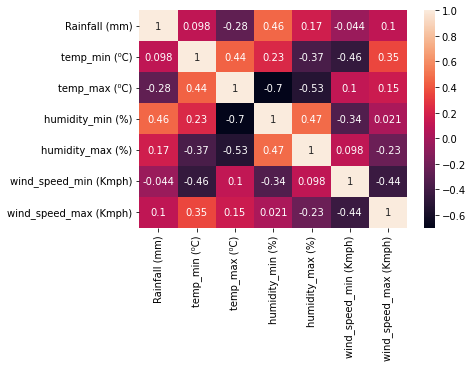

In [22]:
# plt.figure(figsize=(15,15))
sns.heatmap(kham.corr(),annot=True)

In [23]:
kham.drop(["wind_speed_min (Kmph)","wind_speed_max (Kmph)"],axis=1,inplace=True)
kham.fillna(method="ffill",inplace=True)

In [24]:
kham

,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),Date
0,0.000000,12.290000,29.245000,34.832500,91.567500,2019-01-01
1,0.000000,12.867500,31.177500,28.050000,94.537500,2019-01-02
2,0.000000,15.030000,32.125000,38.335000,94.865000,2019-01-03
3,0.000000,16.017500,32.092500,42.032500,94.157500,2019-01-04
4,0.000000,17.257500,31.537500,45.467500,95.600000,2019-01-05
...,...,...,...,...,...,...
1363,0.047619,24.900000,35.980952,56.757143,98.914286,2022-09-26
1364,15.047619,23.542857,34.923810,64.847619,99.504762,2022-09-27
1365,3.042857,24.880952,35.795238,63.271429,99.647619,2022-09-28
1366,30.552381,23.009524,33.757143,74.747619,99.666667,2022-09-29


### Scaling the Data: 

In [25]:
n = StandardScaler()
n1 = StandardScaler()
dates = kham.Date
cols = kham.columns
ind = kham.index

for i in kham:
    if i!="temp_max (⁰C)" and i!="Date":
        kham[i] = n.fit_transform(kham[i].values.reshape(-1,1))
    elif i!="Date":
        n1.fit(kham[i].values.reshape(-1,1))
        kham[i]=n1.transform(kham[i].values.reshape(-1,1))
        
kham["Day"] = kham.Date.dt.day
kham["Month"] = kham.Date.dt.month
kham["Year"] = kham.Date.dt.year
kham.drop("Date",axis=1,inplace=True)
kham

,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),Day,Month,Year
0,-0.379267,-3.032873,-1.722345,-0.991148,-0.348961,1,1,2019
1,-0.379267,-2.876674,-1.153739,-1.371433,0.026712,2,1,2019
2,-0.379267,-2.291776,-0.874953,-0.794767,0.068137,3,1,2019
3,-0.379267,-2.024684,-0.884515,-0.587453,-0.021354,4,1,2019
4,-0.379267,-1.689297,-1.047815,-0.394857,0.161107,5,1,2019
...,...,...,...,...,...,...,...,...
1363,-0.373652,0.377794,0.259597,0.238138,0.580329,26,9,2022
1364,1.394875,0.010724,-0.051449,0.691760,0.655017,27,9,2022
1365,-0.020508,0.372642,0.204954,0.603385,0.673087,28,9,2022
1366,3.222916,-0.133529,-0.394722,1.246840,0.675497,29,9,2022


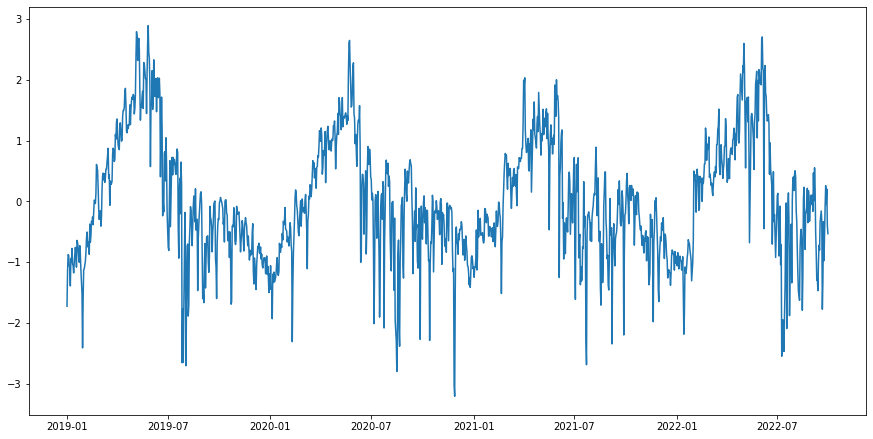

In [26]:
plt.figure(figsize=(15,7.5))
plt.plot(dates,kham["temp_max (⁰C)"])

## Seasonal Decompose: 

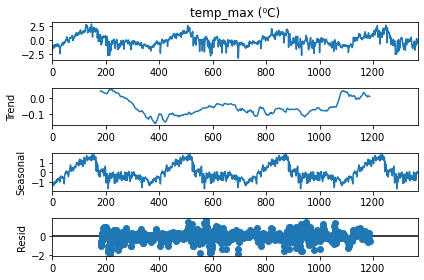

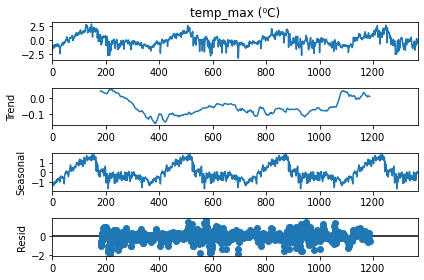

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose


r = seasonal_decompose(kham["temp_max (⁰C)"],model='additive',period=360)
r.plot()

In [28]:
len(kham)

1368

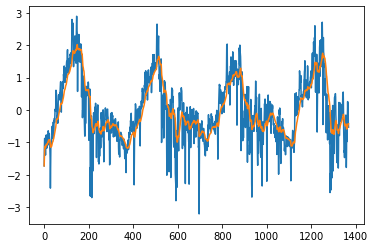

In [29]:
kham["temp_max (⁰C)"].plot()
kham["temp_max (⁰C)"].ewm(span=30).mean().plot()

kham["temp_max (⁰C)"] = kham["temp_max (⁰C)"].ewm(span=30).mean()

## Time Series Forecasting: 

In [30]:
def series_gen(db,label,window=360,lead=360):
    X = db.values
    y = db[label].values

    X_,y_ = [],[]

    for i in range(len(db)-window-lead):
        row = [r for r in X[i:i+window]]
        X_.append(row)
        y_.append(y[i+window:i+window+lead])

    return np.array(X_),np.array(y_)

In [31]:
X,y = series_gen(kham,"temp_max (⁰C)")

In [32]:
X.shape,y.shape

((648, 360, 8), (648, 360))

In [33]:
y

array([[-0.93684356, -0.9561196 , -0.99113108, ..., -0.68241633,
        -0.69178722, -0.71510701],
       [-0.9561196 , -0.99113108, -1.00386142, ..., -0.69178722,
        -0.71510701, -0.73782625],
       [-0.99113108, -1.00386142, -1.03217701, ..., -0.71510701,
        -0.73782625, -0.76576891],
       ...,
       [-0.37403493, -0.32013865, -0.29150456, ..., -0.54728547,
        -0.4952285 , -0.46659759],
       [-0.32013865, -0.29150456, -0.27556515, ..., -0.4952285 ,
        -0.46659759, -0.42327167],
       [-0.29150456, -0.27556515, -0.28144478, ..., -0.46659759,
        -0.42327167, -0.42142973]])

In [34]:
testx,testy = X[-360:],y[-360:]

lead = 30

trainx,trainy = X[:-360-lead],y[:-360-lead]
valx,valy = X[-360-lead:-360],y[-360-lead:-360]

In [35]:
trainx.shape

(258, 360, 8)

### LSTM Model 

In [ ]:
model = Sequential()
model.add(InputLayer((X.shape[1],X.shape[2])))
model.add(LSTM(128))
model.add(Dense(64,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(y.shape[1]))

model.compile(loss=MeanSquaredError(),metrics=RootMeanSquaredError(),optimizer=Adam(learning_rate=0.0001))

model.summary()

model.fit(trainx,trainy,validation_data=(valx,valy),epochs=500)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               70144     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 360)               23400     
                                                                 
Total params: 118,376
Trainable params: 118,376
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
9/9 [==============================]

In [36]:
model = tf.keras.models.load_model("./Models/Khammam")

2023-03-03 23:37:11.167062: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-03 23:37:11.185139: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-03 23:37:11.185338: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-03 23:37:11.185772: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [37]:
pred = model.predict(testx)

2023-03-03 23:37:13.913381: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8800


12/12 [==============================] - 2s 5ms/step


2023-03-03 23:37:14.563230: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


In [38]:
testy[0],pred[0]

(array([-3.58094464e-01, -3.98242324e-01, -4.34263296e-01, -5.53654127e-01,
        -5.84981795e-01, -5.90333834e-01, -5.96786889e-01, -5.83569633e-01,
        -5.39386311e-01, -5.05104281e-01, -5.47247712e-01, -5.51870408e-01,
        -5.27359084e-01, -5.03073223e-01, -4.82704442e-01, -4.50813787e-01,
        -4.28302531e-01, -4.19718027e-01, -4.03732664e-01, -3.87603489e-01,
        -3.81825518e-01, -3.92420110e-01, -3.67981347e-01, -3.41232324e-01,
        -3.23079011e-01, -3.68920916e-01, -3.56935940e-01, -3.49882326e-01,
        -3.41295110e-01, -3.43747645e-01, -3.66923036e-01, -3.91043885e-01,
        -4.05382670e-01, -4.33078671e-01, -4.07282296e-01, -3.82698231e-01,
        -3.81394866e-01, -3.98525632e-01, -3.79116622e-01, -3.58790344e-01,
        -3.41131353e-01, -3.27052297e-01, -3.12344865e-01, -3.04100351e-01,
        -3.36793992e-01, -3.89524969e-01, -4.35418963e-01, -6.02101847e-01,
        -7.69872649e-01, -8.17532823e-01, -7.94864792e-01, -7.70676202e-01,
        -7.6

In [39]:
pred_plot = n1.inverse_transform(pred[:,0].reshape(-1,1)).T[0]
test_plot = n1.inverse_transform(testy[:,0].reshape(-1,1)).T[0]

### Test Forecast: 

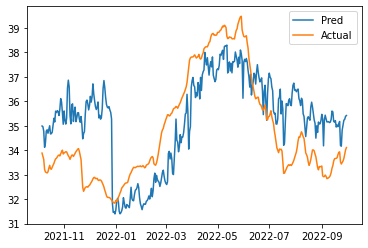

In [40]:
plt.plot(dates[-360:],pred_plot)
plt.plot(dates[-360:],test_plot)
plt.legend(["Pred","Actual"])
# plt.vlines(dates.iloc[-200],-2,2,'r')

12/12 [==============================] - 0s 5ms/step


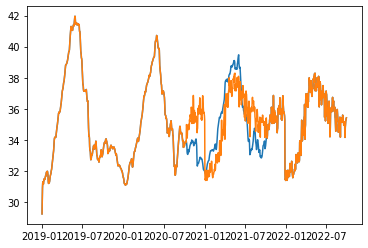

In [41]:
plt.plot(dates,np.concatenate((n1.inverse_transform(X[:,0,2].reshape(-1,1)).T[0],test_plot,n1.inverse_transform(model.predict(X[-360:])[:,0].reshape(-1,1)).T[0])))
plt.plot(dates,np.concatenate((n1.inverse_transform(X[:,0,2].reshape(-1,1)).T[0],pred_plot,n1.inverse_transform(model.predict(X[-360:])[:,0].reshape(-1,1)).T[0])))

In [42]:
model.save("./Models/Khammam")

INFO:tensorflow:Assets written to: ./Models/Khammam/assets


INFO:tensorflow:Assets written to: ./Models/Khammam/assets


### Plotting with Prediction Interval: 

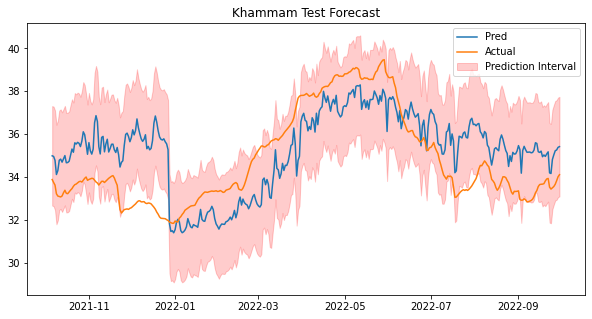

In [43]:
from scipy.stats import t

a = 0.2

n = len(pred_plot)

t_ = t.ppf(1-a/2, df=len(pred_plot)-2)

x = np.arange(len(pred_plot))
x_ = np.mean(x)

interval = t_ * np.sqrt((np.square(pred_plot-test_plot).sum()/(n-2)) * (1+(1/n)+(np.square(x-x_)/np.square(x-x_).sum())))

plt.figure(figsize=(10,5))
plt.plot(dates[-360:],pred_plot)
plt.plot(dates[-360:],test_plot)
plt.fill_between(dates[-360:],pred_plot+interval,pred_plot-interval,color='red',alpha=0.2)

plt.title("Khammam Test Forecast")
plt.legend(["Pred","Actual","Prediction Interval"])

In [44]:
from sklearn.metrics import mean_absolute_percentage_error

print(f'Mean Absolute Percentage Error: {round(mean_absolute_percentage_error(pred_plot,test_plot)*100,3)}')

Mean Absolute Percentage Error: 4.509


## Predicting Heatwaves using Temperature Forecast

In [45]:
db_ = db[db.District=="Khammam"].groupby("Date").mean().resample("W").mean()
db_["Date"] = db_.index

md = db_.Date.dt.strftime("%W")

db_ = db_.groupby(md, sort=False)['temp_max (⁰C)'].mean().reset_index()

/tmp/ipykernel_18788/3389172507.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  db_ = db[db.District=="Khammam"].groupby("Date").mean().resample("W").mean()


In [46]:
ft = model.predict(X[-360:])
ft_plot = n1.inverse_transform(ft[:,0].reshape(-1,1)).T[0]

12/12 [==============================] - 0s 5ms/step


In [47]:
pred_db = pd.DataFrame()
pred_db["Date"] = pd.date_range("2022-09-30",periods=360)
pred_db["Temp"] = ft_plot
pred_db["WeekNo"] = pred_db.Date.dt.strftime("%W")
pred_db["Upper_Limit"] = pred_db["Temp"].values + interval
pred_db["Lower_Limit"] = pred_db["Temp"].values - interval
pred_db["Deviation"] = [ np.float64(i-db_[db_.Date==str(j)]["temp_max (⁰C)"].values) for i,j in pred_db.loc[:,["Upper_Limit","WeekNo"]].values]
pred_db["HeatWave"] = [2 if (pred_db.iloc[i,:]["Deviation"]>7 or pred_db.iloc[i,:]["Temp"]>=47) else (1 if (pred_db.iloc[i,:]["Deviation"]>5 or pred_db.iloc[i,:]["Temp"]>=45) else 0 ) for i in range(len(pred_db))]
pred_db[pred_db.HeatWave!=0]

/tmp/ipykernel_18788/136357867.py:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  pred_db["HeatWave"] = [2 if (pred_db.iloc[i,:]["Deviation"]>7 or pred_db.iloc[i,:]["Temp"]>=47) else (1 if (pred_db.iloc[i,:]["Deviation"]>5 or pred_db.iloc[i,:]["Temp"]>=45) else 0 ) for i in range(len(pred_db))]


,Date,Temp,WeekNo,Upper_Limit,Lower_Limit,Deviation,HeatWave
31,2022-10-31,36.861710,44,39.180592,34.542827,5.53252,1
32,2022-11-01,36.588734,44,38.907529,34.269939,5.259456,1
39,2022-11-08,35.761383,45,38.079582,33.443184,5.175047,1
52,2022-11-21,35.987743,47,38.304911,33.670575,6.163868,1
53,2022-11-22,36.046959,47,38.364052,33.729866,6.223009,1
54,2022-11-23,35.891918,47,38.208936,33.574900,6.067893,1
55,2022-11-24,35.646244,47,37.963188,33.329300,5.822145,1
56,2022-11-25,35.835014,47,38.151885,33.518143,6.010842,1
57,2022-11-26,36.202843,47,38.519641,33.886045,6.378598,1
58,2022-11-27,35.964878,47,38.281604,33.648152,6.140561,1


In [48]:
pred_db.to_csv("./Heatwave Predictions/Khammam.csv")